# README
This is just to understand how to compose an instrument out of components.
In real simulations, we create a python script for the instrument.
See the next tutorial notebook for details

# Preparation

## import tools

In [1]:
import os, numpy as np
import histogram.hdf as hh
import mcvine, mcvine.components

from matplotlib import pyplot as plt
%matplotlib notebook

## work dir

In [2]:
workdir = os.path.expanduser("~/simulations/mcvine/demo")
!mkdir -p {workdir}
%cd {workdir}

/home/97n/simulations/mcvine/demo


# Explore: quick simulation

## create an instrument

In [3]:
instrument = mcvine.instrument()

## play with component factories

In [4]:
mcvine.components.sources.Source_simple

<function mcstas2.components.sources.Source_simple.createFactory.<locals>.new_factory(*args, **kwds)>

## add components

In [5]:
instrument.append(mcvine.components.sources.Source_simple('source'), position=(0,0,0))

In [6]:
instrument.append(mcvine.components.monitors.E_monitor('monitor', filename='IE.dat'), position=(0,0,1))

## run simulation
Reminder: this is not the usual way to run a simulation. Please see the next tutorial notebook

In [7]:
neutrons = instrument.simulate(int(1e5),outputdir="out-mcvine", overwrite_datafiles=True, iteration_no=0)

## check simulation results

In [8]:
for i in range(5):
    print(neutrons[i])

Neutron( state=NeutronState( position=(0.0371706,-0.0196387,1), velocity=(0.778287,24.0404,3235.1), spin=(0, 0) ), time=0.000309109, probability=0.00785354 )
Neutron( state=NeutronState( position=(-0.00684021,0.0176568,1), velocity=(-8.14922,-12.336,3321.2), spin=(0, 0) ), time=0.000301096, probability=0.00785385 )
Neutron( state=NeutronState( position=(-0.0280404,-0.00488998,1), velocity=(12.7726,1.94529,3649.67), spin=(0, 0) ), time=0.000273998, probability=0.00785398 )
Neutron( state=NeutronState( position=(-0.00978,0.0322784,1), velocity=(-11.1761,-0.712008,3646.1), spin=(0, 0) ), time=0.000274266, probability=0.00785371 )
Neutron( state=NeutronState( position=(0.00225148,0.027111,1), velocity=(-11.4982,-25.4476,3296.88), spin=(0, 0) ), time=0.000303317, probability=0.00785367 )


<IPython.core.display.Javascript object>


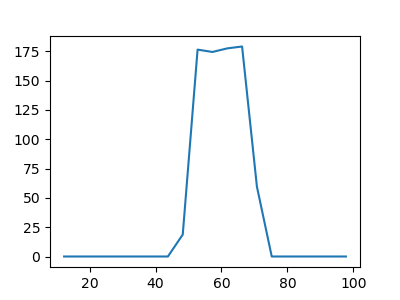

In [9]:
IE = hh.load('./out-mcvine/step0/IE.h5')
plt.figure(figsize=(4,3))
plt.plot(IE.energy, IE.I)